<a href="https://colab.research.google.com/github/guillaumebrethes/Oct_cda_bankmarketing/blob/main/Sprint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 1 : Explorations des données
*   Ceci est la premeire étape d'exploartion des données et de premiere Datavizualisation

In [157]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).



# 1.   Importation des modules / Importing modules


In [158]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/DataScientest /Oct_cda_bankmarketing/Guillaume/bank.csv")

# 2.   Observation de nos données

## 2 - 1 : Etudes préliminaires


In [159]:
df = pd.read_csv("/content/drive/MyDrive/DataScientest /Oct_cda_bankmarketing/Guillaume/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [160]:
df.shape

(11162, 17)

* Notre jeux de données est composées de 11 162 lignes et 17 colonnes, représentées ci-dessous

| Colonne    | Description                                                              | Qualitative / Quantitative |
|------------|--------------------------------------------------------------------------|----------------------------|
| age        | Âge du client                                                            |Quantitative - catégorielles|
| job        | Type d'emploi du client                                                  |Qualitative - continues     |
| marital    | Statut marital du client                                                 |Qualitative - continues     |
| education  | Niveau d'éducation du client                                             |Qualitative - continues     |
| default    | Le client à t'il un défaut sur un crédit                                       |Qualitative - continues     |
| balance    | Solde moyen annuel sur le compte                                                      |Quantitative - catégorielles|
| housing    | Le client à t'il un prêt immobilier                                        |Qualitative - continues     |
| loan       | Le client à un prêt personnel en cour personnel                                         |Qualitative - continues     |
| contact    | Type de communication pour contacter le client                           |Qualitative - continues     |
| day        | Jour du mois pour le dernier contact                                     |Qualitative - continues     |
| month      | Mois de la dernière communication                                        |Qualitative - continues     |
| duration   | Durée de la dernière communication en secondes                           |Quantitative - catégorielles|
| campaign   | Nombre de contacts effectués lors de cette campagne                      |Quantitative - catégorielles|
| pdays      | Nombre de jours écoulés depuis le dernier contact de la dernière campagne|Quantitative - catégorielles|
| previous   | Nombre de contacts effectués avant cette campagne                        |Quantitative - catégorielles|
| poutcome   | Résultat de la dernière campagne de marketing précédente                 |Qualitative - continues     |
| deposit    | Le client à t'il souscrit à un dépôt à terme                               |Qualitative - continues     |


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


*   Observation des valeurs manquantes

In [162]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* Il semberait que nous n'ayons pas de valeurs manquantes.
Regardons maintenant les modalités par colonnes. Les modalitées sonr affichées en % et arrondi à 2 chiffres après la virgule

In [163]:
for col in df.columns:
  unique_value = df[col].unique()
  print(f"> : {col} ==> : {unique_value}")

  value_counts = df[col].value_counts(normalize= True).round(2) * 100
  value_counts_with_percent = value_counts.map("{:.2f} %".format)

  print(value_counts_with_percent)
  print(f'- {df[col].dtypes} -')
  print('---------------------------')

> : age ==> : [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
31    4.00 %
32    4.00 %
34    4.00 %
33    4.00 %
35    4.00 %
       ...  
92    0.00 %
93    0.00 %
88    0.00 %
95    0.00 %
89    0.00 %
Name: age, Length: 76, dtype: object
- int64 -
---------------------------
> : job ==> : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
management       23.00 %
blue-collar      17.00 %
technician       16.00 %
admin.           12.00 %
services          8.00 %
retired           7.00 %
self-employed     4.00 %
student           3.00 %
unemployed        3.00 %
entrepreneur      3.00 %
housemaid         2.00 %
unknown           1.00 %
Name: job, dtype: object
- object -
---------------------------
> : mar

## 2 - 2 : Etudes de notre varible cible : **Deposit**


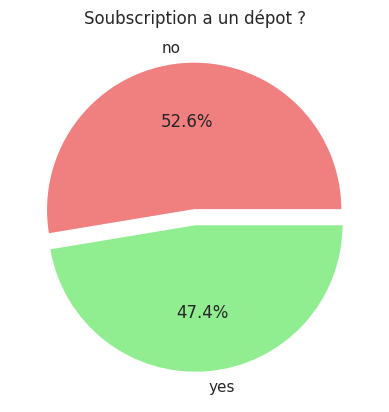

In [164]:
plt.title('Soubscription a un dépot ?')
df['deposit'].value_counts().plot(
        kind= 'pie',
        colors= ['lightcoral', 'lightgreen'],
        autopct='%1.1f%%',
        explode= (0.05, 0.05))
plt.ylabel('')
plt.xlabel('')
plt.show()

# 3.  Traitements des données

## 3 - 1 Gestions des valeurs non désirées (unknown)


* Nous avons donc dans notre jeux de données plusieurs colonnes avec des valeurs non désirées = VND


In [165]:
# Création du DataFrame_unknown
unknown = {'Name': ['job', 'education', 'contact', 'poutcome', 'poutcome'],
        'VND': ['unknown', 'unknown', 'unknown', 'unknown', 'other'],
        '%': [1, 4, 21, 75, 5]}

unknown = pd.DataFrame(unknown)

display(unknown)

,Name,VND,%
0,job,unknown,1
1,education,unknown,4
2,contact,unknown,21
3,poutcome,unknown,75
4,poutcome,other,5


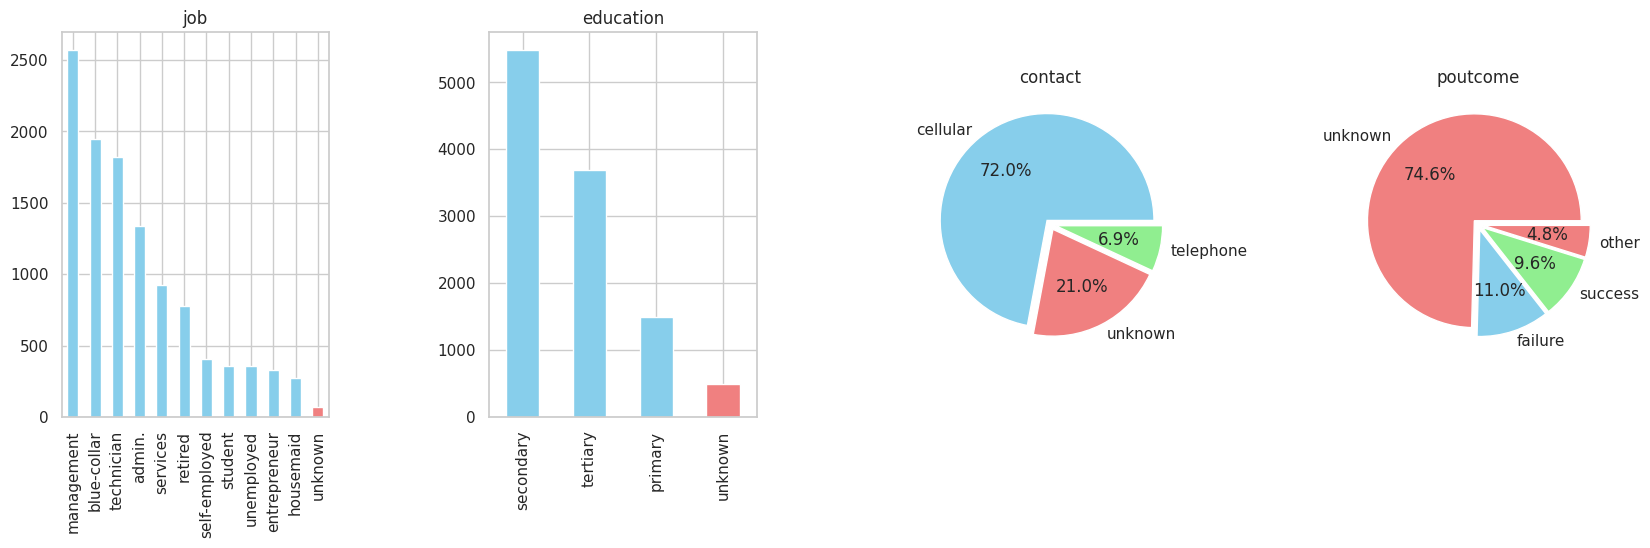

In [166]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Une ligne, quatre colonnes

#1 ### Job
axs[0].set_title('job')
df['job'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'lightcoral'],
    ax=axs[0]
)
axs[0].set_ylabel('')
axs[0].set_xlabel('')

#2 ### Education
axs[1].set_title('education')
df['education'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'skyblue', 'skyblue', 'lightcoral'],
    ax=axs[1]
)
axs[1].set_ylabel('')
axs[1].set_xlabel('')

#3 ### Contact
axs[2].set_title('contact')
df['contact'].value_counts().plot(
    kind='pie',
    colors=['skyblue', 'lightcoral', 'lightgreen'],
    autopct='%1.1f%%',
    explode=(0.05, 0.05, 0.05),
    ax=axs[2]
)
axs[2].set_ylabel('')
axs[2].set_xlabel('')

#4 ### Poutcome
axs[3].set_title('poutcome')
df['poutcome'].value_counts().plot(
    kind='pie',
    colors=['lightcoral', 'skyblue', 'lightgreen', 'lightcoral'],
    autopct='%1.1f%%',
    explode=(0.05, 0.05, 0.05, 0.05),
    ax=axs[3]
)
axs[3].set_ylabel('')
axs[3].set_xlabel('')

fig.subplots_adjust(wspace=0.6, hspace=0.8)
plt.show()


* Les graphiques précédents, représentent visuellement les valeurs **unknown** dans nos variables
* Pour les colonnes '**job**', et '**education**' nous allons supprimer ces
lignes car le % est très faible.
* La colonne '**contact**' ne nous interesse pas dans notre cas metier, nous allons donc la supprimer.
* Pour la colonne '**poutcome**', il semble ideal de créer une categorie pour regrouper les valeurs '**unknown**' et '**other**', qui représentent à eux deux 80%  

* Suppression des valeurs non désirées, et de la colonne contact


In [167]:
df = df.drop('contact', axis=1)

In [168]:
df_drop = df[df['job'] != 'unknown']
df_drop = df_drop.reset_index(drop=True)
df_drop.shape

(11092, 16)

In [169]:
df_drop = df_drop[df_drop['education'] != 'unknown']
df_drop = df_drop.reset_index(drop=True)
df_drop.shape

(10634, 16)

In [170]:
rows_drop = df.shape[0] - df_drop.shape[0]
print(f"Nous avons supprimé {rows_drop} lignes, soit {round((rows_drop / df.shape[0] * 100), 2) } % des valeurs.")

Nous avons supprimé 528 lignes, soit 4.73 % des valeurs.


* Fusion de **other** et **unknown** de la colonne **poutcome**

In [171]:
df_drop['poutcome'] = df_drop['poutcome'].replace('other', 'unknown')
df_drop['poutcome'].value_counts()

unknown    8453
failure    1176
success    1005
Name: poutcome, dtype: int64

## 3 - 2 Gestions des valeurs extrêmes et/ou obérantes


### 3 - 2 - 3 Avant traitement


* Représentations avec des boxplots, des variables numériques avant traitement



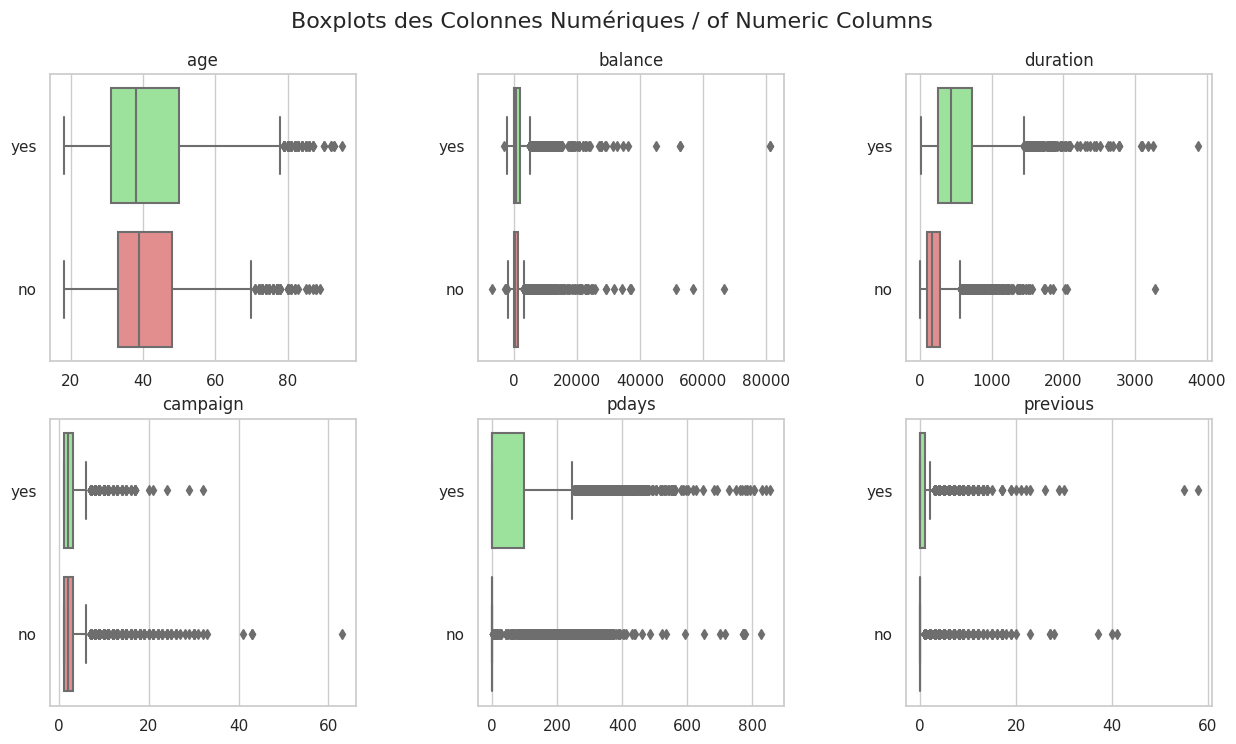

In [172]:
# Set the style
sns.set(style="whitegrid")

# Columns list
columns_num = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
colors = {'yes': 'lightgreen', 'no': 'lightcoral'}

# Create a figure and axis
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Boxplots des Colonnes Numériques / of Numeric Columns', fontsize=16)

# Flatten the axis array for easy indexing
axs = axs.flatten()

# Plot boxplots
for i, column in enumerate(columns_num):
    sns.boxplot(x=df[column],
                y=df['deposit'],
                ax=axs[i],
                palette=colors)
    axs[i].set_title(column)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

# Adjust layout
fig.subplots_adjust(top=0.9, wspace=0.4)
plt.show()


* Calul des quartiles de chaques colonnes numériques

In [173]:
quant = [0.25, 0.5, 0.75]
quant_str = ['0.25', '0.5', '0.75']


quartiles = df_drop[columns_num].quantile(quant)
display(quartiles)

,age,balance,duration,campaign,pdays,previous
0.25,32.0,119.0,138.0,1.0,-1.00,0.0
0.50,38.0,542.0,255.0,2.0,-1.00,0.0
0.75,49.0,1693.0,500.0,3.0,13.75,1.0


* Calcul des quartiles sur chaque colonnes en fonction de la valeur de **deposit**

In [174]:
quant = [0.25, 0.5, 0.75]

quartiles_grouped = df_drop.groupby('deposit')[columns_num].quantile(quant)
display(quartiles_grouped)

age  balance  duration  campaign  pdays  previous
deposit                                                         
no      0.25  33.0     63.0      94.0       1.0   -1.0       0.0
        0.50  39.0    410.0     163.0       2.0   -1.0       0.0
        0.75  48.0   1320.0     282.0       3.0   -1.0       0.0
yes     0.25  31.0    203.0     243.0       1.0   -1.0       0.0
        0.50  38.0    718.0     431.0       2.0   -1.0       0.0
        0.75  50.0   2139.0     731.0       3.0   98.0       2.0

* Définition des seuils IQR

### - Calcul des seuils IQR



In [178]:
# Initialiser des dictionnaires pour stocker les quantiles de chaque colonne
quant_1 = {}
quant_2 = {}
quant_3 = {}

col_num = ['age', 'balance', 'duration', 'campaign']
df_drop_num = df_drop[col_num]

# Boucle pour calculer les quantiles pour chaque colonne
for column in df_drop_num.columns:
    quantiles_column = df_drop_num[column].quantile(quant)
    quant_1[column] = quantiles_column.iloc[0]
    quant_2[column] = quantiles_column.iloc[1]
    quant_3[column] = quantiles_column.iloc[2]


In [179]:
IQR_age = quant_3['age'] - quant_1['age']
IQR_balance = quant_3['balance'] - quant_1['balance']
IQR_duration = quant_3['duration'] - quant_1['duration']
IQR_campaign = quant_3['campaign'] - quant_1['campaign']

IQR_sup_age = quant_3['age'] + (1.5 * IQR_age)
IQR_sup_balance = quant_3['balance'] + (1.5 * IQR_balance)
IQR_sup_duration = quant_3['duration'] + (1.5 * IQR_duration)
IQR_sup_campaign = quant_3['campaign'] + (1.5 * IQR_campaign)

IQR_inf_age = quant_1['age'] - (1.5 * IQR_age)
IQR_inf_balance = quant_1['balance'] - (1.5 * IQR_balance)
IQR_inf_duration = quant_1['duration'] - (1.5 * IQR_duration)
IQR_inf_campaign = quant_1['campaign'] - (1.5 * IQR_campaign)

print('IQR_age', IQR_age )
print('IQR_balance', IQR_balance )
print('IQR_duration', IQR_duration )
print('IQR_campaign', IQR_campaign )

print('IQR_sup_age', IQR_sup_age )
print('IQR_sup_balance', IQR_sup_balance )
print('IQR_sup_duration', IQR_sup_duration )
print('IQR_sup_campaign', IQR_sup_campaign )

print('IQR_inf_age', IQR_inf_age )
print('IQR_inf_balance', IQR_inf_balance )
print('IQR_inf_duration', IQR_inf_duration )
print('IQR_inf_campaign', IQR_inf_campaign )

IQR_age 17.0
IQR_balance 1574.0
IQR_duration 362.0
IQR_campaign 2.0
IQR_sup_age 74.5
IQR_sup_balance 4054.0
IQR_sup_duration 1043.0
IQR_sup_campaign 6.0
IQR_inf_age 6.5
IQR_inf_balance -2242.0
IQR_inf_duration -405.0
IQR_inf_campaign -2.0


### - Fonction du calcul des seuils IQR


In [177]:
def calculate_iqr(df, columns, quantiles):
    """
    Calcule les valeurs de l'IQR (Interquartile Range) ainsi que les bornes supérieures et inférieures pour chaque colonne spécifiée.

    Parameters:
    - df (DataFrame): Le DataFrame contenant les données numérique.
    - columns (list): La liste des colonnes pour lesquelles calculer les valeurs. col_num = ['a remplir]
    - quantiles (list): La liste des quantiles à calculer. quant = ['a remplir']

    Returns:
    - dict: Un dictionnaire contenant les valeurs de l'IQR, les bornes supérieures et inférieures pour chaque colonne spécifiée.
    - pour y acceder : result_iqr[...]
    """

    quant_1 = {}
    quant_3 = {}

    # Boucle pour calculer les quantiles pour chaque colonne numérique
    for column in columns:
        quantiles_column = df[column].quantile(quantiles)
        quant_1[column] = quantiles_column.iloc[0]
        quant_3[column] = quantiles_column.iloc[2]

    # Calculer les IQR
    iqr_values = {f'IQR_{column}': quant_3[column] - quant_1[column] for column in columns}

    # Calculer les bornes supérieures et inférieures pour chaque colonne
    iqr_sup_values = {f'IQR_sup_{column}': quant_3[column] + (1.5 * iqr_values[f'IQR_{column}']) for column in columns}
    iqr_inf_values = {f'IQR_inf_{column}': quant_1[column] - (1.5 * iqr_values[f'IQR_{column}']) for column in columns}

    return {**iqr_values, **iqr_sup_values, **iqr_inf_values}


col_num = ['age', 'balance', 'duration', 'campaign']
quant = [0.25, 0.5, 0.75]

result_iqr = calculate_iqr(df_drop_num, col_num, quant)

# Afficher les résultats
for key, value in result_iqr.items():
    print(f"{key}: {value}")

IQR_age: 17.0
IQR_balance: 1574.0
IQR_duration: 362.0
IQR_campaign: 2.0
IQR_sup_age: 74.5
IQR_sup_balance: 4054.0
IQR_sup_duration: 1043.0
IQR_sup_campaign: 6.0
IQR_inf_age: 6.5
IQR_inf_balance: -2242.0
IQR_inf_duration: -405.0
IQR_inf_campaign: -2.0
